<h1 style="text-align:center; font-size:200%;">NLP LAB 4</h1>
<h2 style="text-align:center; font-size:100%;">Réaliser par: Marouan Daghmoumi</h2>




<h1 style="text-align:center; font-size:150%;">1.Classification Regression</h1>



### Bibliotheques

In [6]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.9 MB/s eta 0:00:00


In [8]:
pip install webdriver_manager

In [9]:
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

import nltk
import re
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

### Web Scraping with Selenium: Extracting and Storing Article Titles and Content

In [ ]:
# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--start-maximized")

# Initialize the Chrome driver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Initialize the CSV file
csv_file = open('data_scraping.csv', mode='w', newline='', encoding='utf-8')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Title', 'Content URL', 'Content'])

try:
    # Open the webpage
    driver.get("https://www.hespress.com/?s=%D8%A5%D9%8A%D8%B1%D8%A7%D9%86")

    # Wait for the page to load
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'card-title')))

    # Scroll down to load more articles
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)  # Adjust the sleep time if needed
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    # Find all article elements after scrolling
    articles = driver.find_elements(By.CLASS_NAME, 'card')

    # Display the number of articles found
    num_articles = len(articles)
    print(f"Number of articles found: {num_articles}")

    # Loop through each article to get the title and content
    for article in articles:
        try:
            # Extract the title
            title_element = article.find_element(By.CLASS_NAME, 'card-title')
            title = title_element.text
            print(f"Title: {title}")

            # Extract the content link
            link_element = article.find_element(By.CLASS_NAME, 'stretched-link')
            content_url = link_element.get_attribute('href')
            print(f"Content URL: {content_url}")

            # Open the content URL in a new tab
            driver.execute_script("window.open();")
            driver.switch_to.window(driver.window_handles[1])
            driver.get(content_url)

            # Wait for the content to load and extract it
            wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'article-content')))
            article_content = driver.find_element(By.CLASS_NAME, 'article-content')
            paragraphs = article_content.find_elements(By.TAG_NAME, 'p')
            content = '\n'.join(p.text for p in paragraphs)
            print(f"Content: {content[:2000]}...")  # Print first 200 characters of content

            # Write the result to the CSV file
            csv_writer.writerow([title, content_url, content])

            # Close the tab and switch back to the original tab
            driver.close()
            driver.switch_to.window(driver.window_handles[0])

        except Exception as e:
            print(f"Error processing article: {e}")
            continue

finally:
    # Close the CSV file
    csv_file.close()
    # Close the driver
    driver.quit()


Number of articles found: 444
Title: مراسم جنازة لرئيسي في طهران قبل الدفن
Content URL: https://www.hespress.com/%d9%85%d8%b1%d8%a7%d8%b3%d9%85-%d8%ac%d9%86%d8%a7%d8%b2%d8%a9-%d9%84%d8%b1%d8%a6%d9%8a%d8%b3%d9%8a-%d9%81%d9%8a-%d8%b7%d9%87%d8%b1%d8%a7%d9%86-%d9%82%d8%a8%d9%84-%d8%a7%d9%84%d8%af%d9%81%d9%86-1370412.html
Content: تجمّع عشرات آلاف الإيرانيين، في وقت مبكر الأربعاء، في وسط طهران للمشاركة في مراسم تشييع الرئيس الإيراني إبراهيم رئيسي، الذي قضى الأحد في حادث تحطم مروحية في شمال غرب إيران، وفق ما أفاد التلفزيون الرسمي.
وتجمّعت الحشود في جامعة طهران ومحيطها، حيث أدى آية الله علي خامنئي، المرشد الأعلى للجمهورية الإسلامية، محاطا بمسؤولين كبار الصلاة على جثمان رئيسي وسبعة من وفد مرافق؛ بينهم حسين أمير عبد اللهيان، وزير الخارجية.
وانضم إلى موكب التشييع إسماعيل هنية، رئيس المكتب السياسي لحركة المقاومة الإسلامية “حماس”، ونعيم قاسم، نائب الأمين العام لحزب الله اللبناني.
وقال هنية للحشود: “نحن مطمئنون أن الجمهورية ماضية في سياستها وثوابتها، برعاية قائدها في دعم فلسطين والمقاومة”، وسط صيحا

### Generate a score for each content based on the presence of specific keywords

In [ ]:
# Keywords and their corresponding weights
keywords = {
    "مصرع": 10,
    "رئيس": 10,
    "حادث": 10,
    "تحطم": 10,
    "طائرة مروحية": 10,
    "إيران": 10,
    "مقتل": 10,
    "وفاة": 10
}

def calculate_score(content):
    total_possible_score = sum(keywords.values())
    actual_score = 0
    for keyword, weight in keywords.items():
        if keyword in content:
            actual_score += weight
    # Normalize the score to be between 0 and 10 and return as a float
    normalized_score = (actual_score / total_possible_score) * 10
    return normalized_score

# Read the existing CSV file
with open('data_scraping.csv', mode='r', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    headers = next(reader)

    # Append the new header for the score
    headers.append('Score')

    # Read the rows, filter out rows with null content, and calculate the scores
    rows = []
    for row in reader:
        content = row[2]  # Assuming the content is in the third column
        if content:  # Check if content is not null or empty
            score = calculate_score(content)
            row.append(score)
            rows.append(row)

# Write the results to a new CSV file
with open('articles.csv', mode='w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(headers)
    writer.writerows(rows)

print("Scores have been calculated and added to 'articles.csv'.")


Scores have been calculated and added to 'articles.csv'.


## Remove Content URL and Title columns

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('articles.csv', encoding='utf-8')

# Drop the 'Title' and 'Content URL' columns
df = df.drop(columns=['Title', 'Content URL'])

# Save the modified DataFrame back to the same CSV file
df.to_csv('articles.csv', index=False, encoding='utf-8')

print("Columns 'Title' and 'Content URL' have been removed and saved to the same 'articles.csv' file.")


Columns 'Title' and 'Content URL' have been removed and saved to the same 'articles.csv' file.


### Visulize dataSet

In [67]:
# read csv file into pandas
df = pd.read_csv("articles.csv")
df.head(10)

,Content,Score
0,تجمع عشرات آلاف الإيرانيين وقت مبكر الأربعاء و...,10.0
1,خبراء مغاربة إيران تلقت ضربة موجعة بسبب حادث س...,10.0
2,قدم شريف هريدي باحث متخصص الشأن الإيراني ملاحظ...,9.0
3,بدأت الثلاثاء مراسم تشييع الرئيس الإيراني إبرا...,9.0
4,أعلنت وزارة الخارجية الأميركية الإثنين إيران ط...,10.0
5,قال محمد جواد ظريف وزير الخارجية الإيراني السا...,9.0
6,عينت إيران الاثنين علي باقري كبير المفاوضين ال...,8.0
7,كلف آية الله علي خامنئي المرشد الأعلى للجمهوري...,9.0
8,أظهر مقطع فيديو لحظة نقل فرق الإنقاذ لجثامين ا...,10.0
9,أعلنت باكستان يوم حداد وطني وفاة الرئيس الإيرا...,8.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Content  440 non-null    object 
 1   Score    440 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


In [69]:
df.groupby('Score').size()

Score
0.00       7
1.00       9
1.25     141
2.00       8
2.50     144
3.00      11
3.30       1
3.75      54
4.00      15
5.00      16
6.00       5
6.25       1
7.00       7
7.50       1
8.00       5
9.00       8
9.50       1
10.00      6
dtype: int64

In [70]:
df.duplicated().sum()

0

In [71]:
missing_scores = df['Score'].isnull().sum()
print(f"Missing scores: {missing_scores}")

Missing scores: 0


In [72]:
unique_scores = df['Score'].unique()
print(f"Unique scores: {unique_scores}")

Unique scores: [10.    9.    8.    6.25  9.5   7.    0.    4.    6.    5.    1.    2.
  2.5   3.    3.75  1.25  7.5   3.3 ]


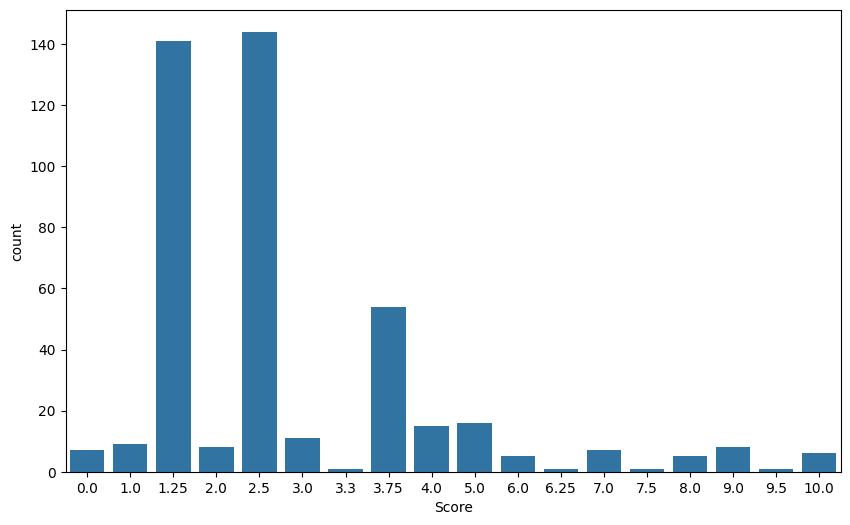

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Score')
plt.show()

## NLP pipeline

### Data Pre-Preocessing

In [75]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Initialize stopwords and stemmer
arabic_stopwords = set(stopwords.words('arabic'))
stemmer = ISRIStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [76]:
# Function to remove HTML tags
def remove_html_tags(text):
    return re.sub(r'<[^>]*>', '', text)

In [77]:
# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

In [78]:
# Function to remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

In [79]:
def txt_preprocess(text):
    text = text.lower()
    return word_tokenize(text)

In [80]:
# Function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in arabic_stopwords]

In [81]:
# Function for stemming/lemmatization
def stem_text(tokens):
    return [stemmer.stem(word) for word in tokens]

In [82]:
# Comprehensive text preprocessing function
def preprocess_text(text):
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    tokens = txt_preprocess(text)
    tokens = remove_stopwords(tokens)
    return ' '.join(tokens)

In [106]:
# Read the CSV file
df = pd.read_csv('articles.csv', encoding='utf-8')

# Preprocess the 'Content' column
df['Content'] = df['Content'].apply(preprocess_text)

In [107]:
df.head()

,Content,Score
0,تجمع عشرات آلاف الإيرانيين وقت مبكر الأربعاء و...,10.0
1,خبراء مغاربة إيران تلقت ضربة موجعة بسبب حادث س...,10.0
2,قدم شريف هريدي باحث متخصص الشأن الإيراني ملاحظ...,9.0
3,بدأت الثلاثاء مراسم تشييع الرئيس الإيراني إبرا...,9.0
4,أعلنت وزارة الخارجية الأميركية الإثنين إيران ط...,10.0


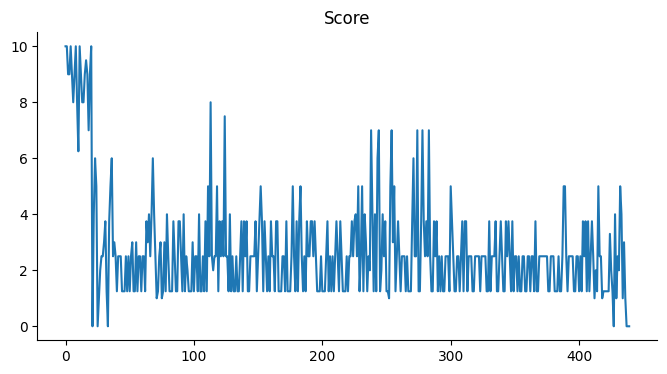

In [108]:
from matplotlib import pyplot as plt
df['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

## Build Models

## RNN

In [2]:
pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [91]:
pip install tensorflow keras scikit-learn

In [109]:
# Prepare the data for the RNN
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Content'])
sequences = tokenizer.texts_to_sequences(df['Content'])
word_index = tokenizer.word_index

# Pad sequences
maxlen = 100  # Choose a max length for sequences
data = pad_sequences(sequences, maxlen=maxlen)

# Prepare labels
labels = df['Score'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build the RNN model
def build_rnn_model(optimizer):
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=maxlen))
    model.add(SimpleRNN(128))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Define optimizers to test
optimizers = {
    'adam': Adam(),
    'sgd': SGD(),
    'rmsprop': RMSprop()
}

# Train and evaluate the model for each optimizer
results = {}
for opt_name, opt in optimizers.items():
    print(f"Training with optimizer: {opt_name}")
    model = build_rnn_model(opt)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"{opt_name} - Test Loss: {loss}, Test MAE: {mae}")
    results[opt_name] = {'loss': loss, 'mae': mae}

# Print results
print("Results for different optimizers:")
for opt_name, result in results.items():
    print(f"{opt_name} - Loss: {result['loss']}, MAE: {result['mae']}")

Training with optimizer: adam
Epoch 1/10
9/9 [==============================] - 2s 112ms/step - loss: 5.8818 - mae: 1.7349 - val_loss: 3.9823 - val_mae: 1.5337
Epoch 2/10
9/9 [==============================] - 1s 81ms/step - loss: 3.6282 - mae: 1.4680 - val_loss: 3.5384 - val_mae: 1.2535
Epoch 3/10
9/9 [==============================] - 1s 83ms/step - loss: 3.3390 - mae: 1.1924 - val_loss: 3.4225 - val_mae: 1.3252
Epoch 4/10
9/9 [==============================] - 1s 87ms/step - loss: 2.9898 - mae: 1.2404 - val_loss: 3.3480 - val_mae: 1.2115
Epoch 5/10
9/9 [==============================] - 1s 120ms/step - loss: 2.3639 - mae: 0.9506 - val_loss: 3.3412 - val_mae: 1.2374
Epoch 6/10
9/9 [==============================] - 1s 119ms/step - loss: 1.2848 - mae: 0.7013 - val_loss: 3.3954 - val_mae: 1.3621
Epoch 7/10
9/9 [==============================] - 1s 125ms/step - loss: 0.6734 - mae: 0.5220 - val_loss: 3.4456 - val_mae: 1.3714
Epoch 8/10
9/9 [==============================] - 1s 126ms/step

## New text to be processed and predicted

In [114]:
new_text = "احتل المنتخب المغربي لكرة القدم داخل القاعة المرتبة السادسة تصنيف الاتحاد الدولي لكرة القدم وأعلن فيفا عبر موقعه الرسمي الإنترنت ترتيب منتخبات كرة القدم داخل القاعة احتل المنتخب المغربي المركز السادس بـ143055 نقطة بفارق نقاط منتخب الأرجنتين صاحب المركز الخامس وتصدر الترتيب العالمي منتخب البرازيل بـ156841 نقطة متبوعا بمنتخب البرتغال بـ152761 نقطة حلت إسبانيا ثالثة بـ151442 نقطة وبعدها إيران بـ146933 نقطة وكان المنتخب الوطني توج بلقب كأس أمم إفريقيا للمرة الثالثة التوالي تغلبه المباراة النهائية لعبت بالرباط نظيره الأنغولي بنتيجة 5 لـ 1 وسيشارك أسود القاعة نهائيات كأس العالم ستحتضنها أوزبكستان 14 شتنبر 6 المقبلين"

# Preprocess the new text
preprocessed_text = preprocess_text(new_text)

# Tokenize the preprocessed text
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words to match your original tokenizer settings
tokenizer.fit_on_texts([preprocessed_text])
sequences = tokenizer.texts_to_sequences([preprocessed_text])

# Pad the sequence
maxlen = 100  # Adjust maxlen to match your original sequence length
padded_sequence = pad_sequences(sequences, maxlen=maxlen)

# Make a prediction
prediction = model.predict(padded_sequence)

# Output the prediction
print(f"Prediction: {prediction}")

1/1 [==============================] - 0s 27ms/step
Prediction: [[2.919422]]


## Bidirectional RNN GRU and LSTM

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 100)          3389300   
                                                                 
 bidirectional_8 (Bidirecti  (None, 100, 128)          84480     
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 3515061 (13.41 MB)
Trainable params: 3515061 (13.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "

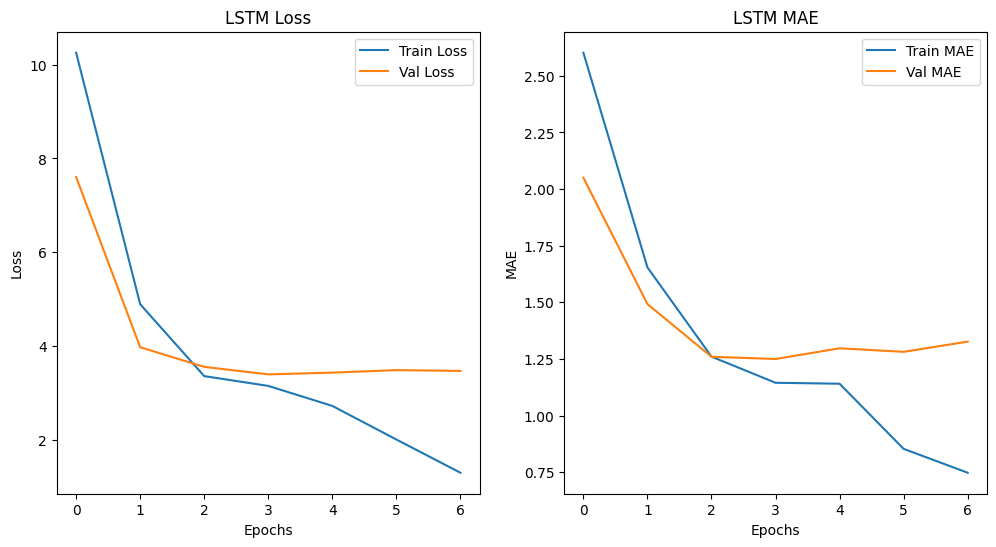

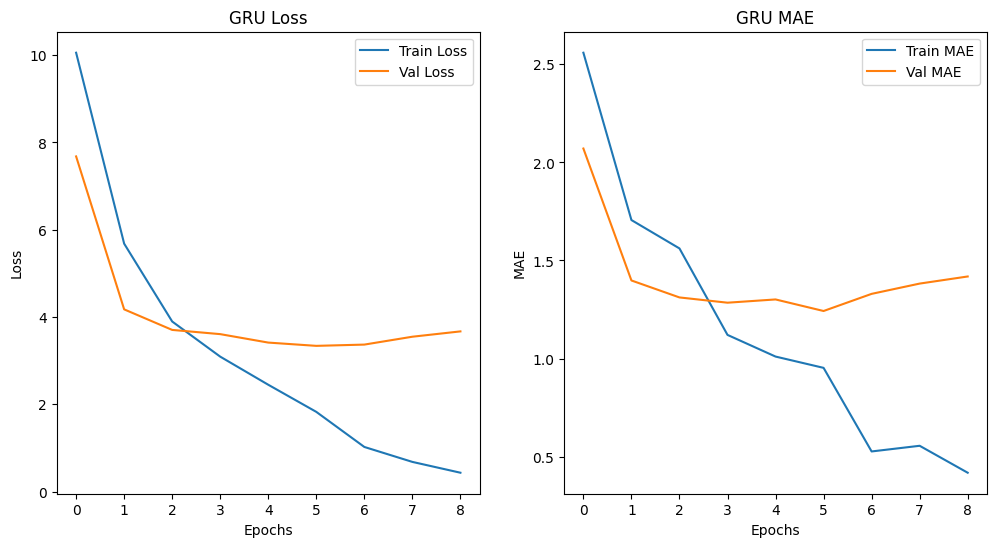

In [118]:

# Apply preprocessing to the content
df['Content'] = df['Content'].apply(preprocess_text)

# Word2Vec model
model_word2vec = Word2Vec(df['Content'].apply(lambda x: x.split()), vector_size=100, window=5, min_count=1, workers=4)

# Function to get word vector
def get_word_vector(text, model_word2vec):
    tokens = text.split()
    textvector = np.zeros((100,), dtype='float32')
    for token in tokens:
        try:
            textvector += model_word2vec.wv[token]
        except KeyError:
            continue
    return textvector

# Apply word vector transformation
df['textvector'] = df['Content'].apply(lambda x: get_word_vector(x, model_word2vec))

# Prepare the data for the RNN
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Content'])
sequences = tokenizer.texts_to_sequences(df['Content'])
word_index = tokenizer.word_index

# Pad sequences
maxlen = 100  # Choose a max length for sequences
data = pad_sequences(sequences, maxlen=maxlen)

# Prepare labels
labels = df['Score'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define function to create Bidirectional RNN with LSTM
def create_bidirectional_lstm():
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=maxlen))
    model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=32)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Define function to create Bidirectional RNN with GRU
def create_bidirectional_gru():
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=maxlen))
    model.add(Bidirectional(GRU(units=64, return_sequences=True)))
    model.add(Bidirectional(GRU(units=32)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create models
lstm_model = create_bidirectional_lstm()
gru_model = create_bidirectional_gru()

# Display model summaries
print(lstm_model.summary())
print(gru_model.summary())

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Train GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate models
lstm_loss, lstm_mae = lstm_model.evaluate(X_test, y_test)
gru_loss, gru_mae = gru_model.evaluate(X_test, y_test)

print(f"LSTM Model - Loss: {lstm_loss}, MAE: {lstm_mae}")
print(f"GRU Model - Loss: {gru_loss}, MAE: {gru_mae}")

# Function to plot training history
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Val MAE')
    plt.title(f'{model_name} MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

# Plot history for LSTM
plot_history(lstm_history, 'LSTM')

# Plot history for GRU
plot_history(gru_history, 'GRU')